## 공공데이터를 이용한 카페 상권분석(2022 Ver.)

패스트캠퍼스 강의에서 2020년 공공데이터로 카페상권분석한 내용을 2022년 버전으로 재분석하며 내용 추가 

[데이터] https://www.data.go.kr/data/15012005/fileData.do

In [68]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

## 데이터 불러오기

In [9]:
# 다운로드 받은 데이터중 일부 열어서 데이터 확인하기 
temp = pd.read_csv("commercial_area_info/소상공인시장진흥공단_상가(상권)정보_서울_202206.csv",encoding='utf-8')
temp.head(2)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23324279,제중건강원,NaN,D,소매,D10,건강/미용식품,D10A07,건강원,G47216,...,1156010600100410002034626,NaN,서울특별시 영등포구 영중로14길 11-17,150035,7250.0,NaN,1,NaN,126.907168,37.520613
1,24525909,민속악기사,NaN,D,소매,D04,취미/오락관련소매,D04A09,악기판매,G47593,...,1120012200101420011000227,NaN,서울특별시 성동구 용답5길 2,133849,4803.0,NaN,NaN,NaN,127.049018,37.566857


In [10]:
# data 폴더에 있는 모든 csv 파일을 읽어오기 위해 glob 사용
from glob import glob

# csv 목록 불러오기
file_names = glob("commercial_area_info/*.csv")
total = pd.DataFrame()

# 모든 csv 병합하기
for file_name in file_names:
    temp = pd.read_csv(file_name, encoding='utf-8')
    total = pd.concat([total, temp])

# reset index
total.reset_index(inplace=True, drop=True)
total

C:\Users\a\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,25033300,동그라미중고타이어,NaN,D,소매,D23,자동차/자동차용품,D23A04,타이어판매,G45211,...,4215011100110960006010791,NaN,강원도 강릉시 가작로 270,210110.0,25488.0,1,NaN,NaN,128.904472,37.770252
1,17174549,세인트존스호텔Ohcrab,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,NaN,...,4215011300100010001017124,세인트존스호텔,강원도 강릉시 창해로 307,210120.0,25467.0,NaN,NaN,NaN,128.920908,37.791299
2,17174079,평창라마다호텔,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,NaN,...,4276038024102450036000001,NaN,강원도 평창군 대관령면 오목길 107,232954.0,25342.0,NaN,NaN,NaN,128.717971,37.660051
3,17173904,호텔탑스텐스카이라운지,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,NaN,...,4215035029100920001000002,NaN,강원도 강릉시 옥계면 헌화로 455-34,210831.0,25633.0,NaN,NaN,NaN,129.052902,37.654680
4,24412526,레이디가구,NaN,D,소매,D15,가구소매,D15A01,일반가구소매,G47520,...,4213011500111400020035715,NaN,강원도 원주시 송삼길 156-19,220150.0,26385.0,NaN,NaN,NaN,127.917307,37.327668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363989,18464876,광수가코다리,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,4371025346004280007001720,NaN,충청북도 청주시 청원구 오창읍 과학산업2로 271,363884.0,28121.0,NaN,1,NaN,127.414962,36.709197
2363990,18469519,파티라운지운천,NaN,D,소매,D02,선물/팬시/기념품,D02A02,꽃집/꽃배달,G47851,...,4311310400109520000015777,NaN,충청북도 청주시 흥덕구 사운로187번길 64-2,361841.0,28471.0,NaN,NaN,NaN,127.474862,36.644013
2363991,18444490,도배,NaN,F,생활서비스,F15,주택수리,F15A02,미장타일도배도장,NaN,...,4311310200102310017003360,세종회관,충청북도 청주시 서원구 사직대로 133-1,362832.0,28567.0,NaN,NaN,NaN,127.462285,36.635306
2363992,18446727,황금물류,NaN,F,생활서비스,F08,대행업,F08A03,고객관리대행,N75919,...,4311112000101990001048789,금천현대아파트,충청북도 청주시 상당구 중고개로337번길 23,360766.0,28727.0,113,NaN,NaN,127.504480,36.629324


In [11]:
print(total.shape)

(2363994, 39)


In [13]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363994 entries, 0 to 2363993
Data columns (total 39 columns):
 #   Column     Dtype  
---  ------     -----  
 0   상가업소번호     int64  
 1   상호명        object 
 2   지점명        object 
 3   상권업종대분류코드  object 
 4   상권업종대분류명   object 
 5   상권업종중분류코드  object 
 6   상권업종중분류명   object 
 7   상권업종소분류코드  object 
 8   상권업종소분류명   object 
 9   표준산업분류코드   object 
 10  표준산업분류명    object 
 11  시도코드       int64  
 12  시도명        object 
 13  시군구코드      int64  
 14  시군구명       object 
 15  행정동코드      int64  
 16  행정동명       object 
 17  법정동코드      int64  
 18  법정동명       object 
 19  지번코드       int64  
 20  대지구분코드     int64  
 21  대지구분명      object 
 22  지번본번지      int64  
 23  지번부번지      float64
 24  지번주소       object 
 25  도로명코드      int64  
 26  도로명        object 
 27  건물본번지      int64  
 28  건물부번지      float64
 29  건물관리번호     object 
 30  건물명        object 
 31  도로명주소      object 
 32  구우편번호      float64
 33  신우편번호      float64
 34  동정보        object 

In [14]:
# 분석에 필요한 column 고르기
data = total[['상호명', '지점명', '상권업종대분류명', '상권업종중분류명','상권업종소분류명', '시도명',
             '시군구명', '행정동명']]

data

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명
0,동그라미중고타이어,NaN,소매,자동차/자동차용품,타이어판매,강원도,강릉시,포남1동
1,세인트존스호텔Ohcrab,NaN,숙박,호텔/콘도,호텔/콘도,강원도,강릉시,초당동
2,평창라마다호텔,NaN,숙박,호텔/콘도,호텔/콘도,강원도,평창군,대관령면
3,호텔탑스텐스카이라운지,NaN,숙박,호텔/콘도,호텔/콘도,강원도,강릉시,옥계면
4,레이디가구,NaN,소매,가구소매,일반가구소매,강원도,원주시,무실동
...,...,...,...,...,...,...,...,...
2363989,광수가코다리,NaN,음식,한식,한식/백반/한정식,충청북도,청주시 청원구,오창읍
2363990,파티라운지운천,NaN,소매,선물/팬시/기념품,꽃집/꽃배달,충청북도,청주시 흥덕구,운천.신봉동
2363991,도배,NaN,생활서비스,주택수리,미장타일도배도장,충청북도,청주시 서원구,사창동
2363992,황금물류,NaN,생활서비스,대행업,고객관리대행,충청북도,청주시 상당구,금천동


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363994 entries, 0 to 2363993
Data columns (total 8 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   상호명       object
 1   지점명       object
 2   상권업종대분류명  object
 3   상권업종중분류명  object
 4   상권업종소분류명  object
 5   시도명       object
 6   시군구명      object
 7   행정동명      object
dtypes: object(8)
memory usage: 144.3+ MB


In [16]:
# 메모리 낭비를 막기 위해 필요없는 변수는 제거
del total

In [20]:
data['상권업종대분류명'].value_counts()

음식          797182
소매          754830
생활서비스       428890
학문/교육       163235
부동산          95870
관광/여가/오락     53313
숙박           41393
스포츠          29281
Name: 상권업종대분류명, dtype: int64

In [22]:
data['상권업종중분류명'].value_counts().sort_values(ascending=False)

한식            298081
이/미용/건강       168230
종합소매점         147406
음/식료품소매       111035
커피점/카페        110455
               ...  
경마/경륜/성인오락      1187
스포츠/운동           476
종교용품판매           410
유스호스텔            326
부동산관련서비스           8
Name: 상권업종중분류명, Length: 89, dtype: int64

## 데이터 살펴보기

#### 전국 커피 전문점 

In [23]:
#set(data["상권업종대분류명"])
set(data["상권업종중분류명"])

{'PC/오락/당구/볼링등',
 '가구소매',
 '가방/신발/액세서리',
 '가전제품소매',
 '가정/주방/인테리어',
 '개인/가정용품수리',
 '개인서비스',
 '건강/미용식품',
 '경마/경륜/성인오락',
 '광고/인쇄',
 '기타서비스업',
 '기타음식업',
 '기타판매업',
 '놀이/여가/취미',
 '닭/오리요리',
 '대중목욕탕/휴게',
 '대행업',
 '도서관/독서실',
 '모텔/여관/여인숙',
 '무도/유흥/가무',
 '물품기기대여',
 '민박/하숙',
 '법무세무회계',
 '별식/퓨전요리',
 '부동산관련서비스',
 '부동산중개',
 '부페',
 '분식',
 '분양',
 '사무/문구/컴퓨터',
 '사진',
 '사진/광학/정밀기기소매',
 '선물/팬시/기념품',
 '세탁/가사서비스',
 '스포츠/운동',
 '시계/귀금속소매',
 '실내운동시설',
 '실외운동시설',
 '애견/애완/동물',
 '양식',
 '연극/영화/극장',
 '예술품/골동품/수석/분재',
 '예식/의례/관혼상제',
 '요가/단전/마사지',
 '운동/경기용품소매',
 '운송/배달/택배',
 '운영관리시설',
 '유스호스텔',
 '유아교육',
 '유아용품',
 '유흥주점',
 '음/식료품소매',
 '음식배달서비스',
 '의복의류',
 '의약/의료품소매',
 '이/미용/건강',
 '인력/고용/용역알선',
 '일식/수산물',
 '자동차/이륜차',
 '자동차/자동차용품',
 '장례/묘지',
 '제과제빵떡케익',
 '종교용품판매',
 '종합소매점',
 '주유소/충전소',
 '주택수리',
 '중고품소매/교환',
 '중식',
 '책/서적/도서',
 '철물/난방/건설자재소매',
 '취미/오락관련소매',
 '캠프/별장/펜션',
 '커피점/카페',
 '패스트푸드',
 '페인트/유리제품소매',
 '평가/개발/관리',
 '학문교육기타',
 '학원-보습교습입시',
 '학원-어학',
 '학원-예능취미체육',
 '학원-음악미술무용',
 '학원-자격/국가고시',
 '학원-창업취업취미',
 '학원-컴퓨터',
 

In [24]:
# 카페 선별하기
df_coffee = data[data["상권업종중분류명"] == "커피점/카페"]

# index를 다시 세팅
df_coffee.index = range(len(df_coffee))
print("전국 커피 전문점 점포 수 : ", len(df_coffee))
df_coffee

전국 커피 전문점 점포 수 :  110455


,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명
0,키즈까페아이사랑,NaN,음식,커피점/카페,커피전문점/카페/다방,강원도,강릉시,성덕동
1,힐링,NaN,음식,커피점/카페,커피전문점/카페/다방,강원도,원주시,단구동
2,드롭탑,속초엑스포점,음식,커피점/카페,커피전문점/카페/다방,강원도,속초시,조양동
3,상유재카페,NaN,음식,커피점/카페,커피전문점/카페/다방,강원도,정선군,정선읍
4,수정다방,NaN,음식,커피점/카페,커피전문점/카페/다방,강원도,고성군,거진읍
...,...,...,...,...,...,...,...,...
110450,코난,NaN,음식,커피점/카페,보드게임카페,충청북도,청주시 상당구,용암1동
110451,디애플,NaN,음식,커피점/카페,전통찻집/인삼찻집,충청북도,충주시,연수동
110452,세븐다실,NaN,음식,커피점/카페,전통찻집/인삼찻집,충청북도,청주시 청원구,내수읍
110453,몽베르,NaN,음식,커피점/카페,커피전문점/카페/다방,충청북도,제천시,청풍면


In [27]:
# 2020년 6월 113705곳에 비해 2.86% 감소 
round(((110455-113705)/113705)*100,2)

-2.86

- 전국에 가장 많은 카페프렌차이즈는 어디일까? 한블럭에 하나씩 있는 스타벅스? 

In [32]:
# 전국 커피프랜차이즈 순위
df_coffee['상호명'].value_counts().sort_values(ascending=False).head(30)

카페         4975
이디야커피      2007
스타벅스       1205
컴포즈커피      1083
투썸플레이스      880
빽다방         741
메가엠지씨커피     713
더벤티         624
공차          527
커피베이        511
커피에반하다      474
할리스커피       359
메가커피        355
파스쿠찌        304
엔제리너스       304
요거프레소       300
디저트39       245
설빙          244
더리터         239
하삼동커피       224
탐앤탐스        210
셀렉토커피       207
카페베네        205
달리는커피       201
감성커피        195
청년다방        184
커피빈         180
나우커피        173
커피하우스       171
드롭탑         170
Name: 상호명, dtype: int64

- 상호명이 프렌차이즈명과 일치하지 않는 경우가 있으므로 프랜차이즈 명으로 재검색해보기로 함

#### 전국 이디야 : 예상외로 전국에 이디야 매장이 가장 많이 분포하고 있었음

In [88]:
# 전국 이디야 점포 수
df_ediya = df_coffee[df_coffee["상호명"].str.contains("이디야")]
df_ediya.index = range(len(df_ediya))
print('전국 이디야 점포 수 :', len(df_ediya))
df_ediya.head(100)


전국 이디야 점포 수 : 2156


,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명
0,이디야커피,원주반곡동점,음식,커피점/카페,커피전문점/카페/다방,강원도,원주시,반곡관설동
1,이디야커피,춘천제일점,음식,커피점/카페,커피전문점/카페/다방,강원도,춘천시,강남동
2,이디야커피,흥업점,음식,커피점/카페,커피전문점/카페/다방,강원도,원주시,흥업면
3,이디야커피,정동진역점,음식,커피점/카페,커피전문점/카페/다방,강원도,강릉시,강동면
4,이디야커피,속초동명항점,음식,커피점/카페,커피전문점/카페/다방,강원도,속초시,동명동
...,...,...,...,...,...,...,...,...
95,이디야커피,춘천교대점,음식,커피점/카페,커피전문점/카페/다방,강원도,춘천시,석사동
96,이디야커피,북삼점,음식,커피점/카페,커피전문점/카페/다방,강원도,동해시,북삼동
97,이디야커피,원주청구점,음식,커피점/카페,커피전문점/카페/다방,강원도,원주시,명륜2동
98,이디야커피,단오공원점,음식,커피점/카페,커피전문점/카페/다방,강원도,강릉시,강남동


#### 전국 스타벅스 점포 수

In [37]:
df_starbucks = df_coffee[df_coffee["상호명"].str.contains("스타벅스")]
df_starbucks.index = range(len(df_starbucks))
print('전국 스타벅스 점포 수 :', len(df_starbucks))
df_starbucks.head()

전국 스타벅스 점포 수 : 1505


,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명
0,스타벅스강릉안목항점,강릉안목항점,음식,커피점/카페,커피전문점/카페/다방,강원도,강릉시,송정동
1,스타벅스춘천후평DT점,춘천후평DT점,음식,커피점/카페,커피전문점/카페/다방,강원도,춘천시,후평3동
2,스타벅스,춘천명동점,음식,커피점/카페,커피전문점/카페/다방,강원도,춘천시,약사명동
3,스타벅스설악워터피아점,설악워터피아점,음식,커피점/카페,커피전문점/카페/다방,강원도,속초시,영랑동
4,스타벅스,원주터미널점,음식,커피점/카페,커피전문점/카페/다방,강원도,원주시,무실동


#### 전국 메가엠지씨커피 : 양많아 가성비좋은 메가커피가 투썸을 제치고 탑3순위로 올라옴

In [84]:
df_megamgc = df_coffee[df_coffee['상호명'].str.contains('메가엠지씨')]
df_megamgc.index = range(len(df_megamgc))
print('전국 메가엠지씨커피 점포 수 :', len(df_megamgc))
df_megamgc.head()

전국 메가엠지씨커피 점포 수 : 1132


,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명
0,메가엠지씨커피,춘천팔호광장점,음식,커피점/카페,커피전문점/카페/다방,강원도,춘천시,효자2동
1,메가엠지씨커피,NaN,음식,커피점/카페,커피전문점/카페/다방,강원도,춘천시,후평3동
2,메가엠지씨커피,동해시청점,음식,커피점/카페,커피전문점/카페/다방,강원도,동해시,천곡동
3,메가엠지씨커피유천지구점,NaN,음식,커피점/카페,커피전문점/카페/다방,강원도,강릉시,홍제동
4,메가엠지씨커피,강릉교동택지점,음식,커피점/카페,커피전문점/카페/다방,강원도,강릉시,교1동


#### 전국 컴포즈커피 점포 수 : 가격이 좋은 컴포즈커피가 투썸을 제치고 탑4순위로 올라옴

In [97]:
df_compose = df_coffee[df_coffee["상호명"].str.contains("컴포즈커피")]
df_compose.index = range(len(df_compose))
print('전국 컴포즈커피 점포 수 :', len(df_compose))
df_compose.head()

전국 컴포즈커피 점포 수 : 1107


,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명
0,컴포즈커피,동해효가점,음식,커피점/카페,커피전문점/카페/다방,강원도,동해시,북삼동
1,컴포즈커피,속초교동점,음식,커피점/카페,커피전문점/카페/다방,강원도,속초시,노학동
2,컴포즈커피,강릉교동점,음식,커피점/카페,커피전문점/카페/다방,강원도,강릉시,교1동
3,컴포즈커피,NaN,음식,커피점/카페,커피전문점/카페/다방,강원도,인제군,북면
4,컴포즈커피,원주혁신도시건강로점,음식,커피점/카페,커피전문점/카페/다방,강원도,원주시,반곡관설동


#### 전국 투썸플레이스 점포 수 : 케익이 맛있는 투썸이 탑5

In [44]:
df_2some = df_coffee[df_coffee['상호명'].str.contains('투썸플레이스')]
df_2some.index = range(len(df_2some))
print('전국 투썸플레이스 점포 수 :', len(df_2some))
df_2some.head()

전국 투썸플레이스 점포 수 : 1073


,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명
0,투썸플레이스,춘천명동점,음식,커피점/카페,커피전문점/카페/다방,강원도,춘천시,조운동
1,투썸플레이스,소양강댐점,음식,커피점/카페,커피전문점/카페/다방,강원도,춘천시,신북읍
2,투썸플레이스,용평리조트점,음식,커피점/카페,커피전문점/카페/다방,강원도,평창군,대관령면
3,투썸플레이스,철원와수점,음식,커피점/카페,커피전문점/카페/다방,강원도,철원군,서면
4,투썸플레이스동해중앙점,동해중앙점,음식,커피점/카페,커피전문점/카페/다방,강원도,동해시,천곡동


#### 전국 빽다방 점포 수 

In [45]:
df_bbaek = df_coffee[df_coffee['상호명'].str.contains('빽다방')]
df_bbaek.index = range(len(df_bbaek))
print('전국 빽다방 점포 수 :', len(df_bbaek))
df_bbaek.head()

전국 빽다방 점포 수 : 837


,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명
0,빽다방,춘천석사CGV점,음식,커피점/카페,커피전문점/카페/다방,강원도,춘천시,석사동
1,빽다방동해천곡점,동해천곡점,음식,커피점/카페,커피전문점/카페/다방,강원도,동해시,천곡동
2,빽다방,원주중앙1호점,음식,커피점/카페,커피전문점/카페/다방,강원도,원주시,일산동
3,빽다방,삼척대학로점,음식,커피점/카페,커피전문점/카페/다방,강원도,삼척시,성내동
4,빽다방,홍천중앙점,음식,커피점/카페,커피전문점/카페/다방,강원도,홍천군,홍천읍


- 그렇다면 서울에 가장 많이 분포한 커피프랜차이즈는 어디일까? 여전히 이디야? 

#### 서울내 커피 전문점 

In [89]:
# 카페 중 "서울"에 위치한 점포 수
df_seoul_coffee = data[(data["상권업종중분류명"] == "커피점/카페") & (data["시도명"] == "서울특별시")]
df_seoul_coffee.index = range(len(df_seoul_coffee))
print('서울시 내 커피 전문점 점포 수 :', len(df_seoul_coffee))
df_seoul_coffee

서울시 내 커피 전문점 점포 수 : 20092


,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명
0,커피빈,코리아대학로대명거리점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,종로구,혜화동
1,요거프레소,쌍문점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,도봉구,쌍문2동
2,우성커피숍,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,양천구,신월4동
3,버블베어,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강서구,방화3동
4,알뤼르,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,대치4동
...,...,...,...,...,...,...,...,...
20087,케이알,NaN,음식,커피점/카페,보드게임카페,서울특별시,영등포구,대림3동
20088,모센트,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,용산구,한강로동
20089,베러나이브스,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,송파구,석촌동
20090,빽다방,상계보람점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,노원구,상계5동


#### 서울 스타벅스

In [90]:
# 서울내 스벅 점포수
df_seoul_starbucks = df_starbucks[df_starbucks["시도명"] == "서울특별시"]
df_seoul_starbucks.index = range(len(df_seoul_starbucks))
print('서울시 내 스타벅스 점포 수 :', len(df_seoul_starbucks))
df_seoul_starbucks.head()

서울시 내 스타벅스 점포 수 : 465


,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명
0,스타벅스,동숭로아트점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,종로구,이화동
1,스타벅스남부터미널2점,남부터미널2점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,서초3동
2,스타벅스,현대목동점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,양천구,목1동
3,스타벅스미아사거리역점,미아사거리역점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강북구,송중동
4,스타벅스,가로수길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,신사동


#### 서울 이디야

In [91]:
# 서울내 이디야 점포수
df_seoul_ediya = df_ediya[df_ediya["시도명"] == "서울특별시"]
df_seoul_ediya.index = range(len(df_seoul_ediya))
print('서울시 내 이디야 점포 수 :', len(df_seoul_ediya))
df_seoul_ediya.head()

서울시 내 이디야 점포 수 : 431


,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명
0,이디야커피,신길역점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,영등포구,신길1동
1,이디야커피,라이프점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,영등포구,여의동
2,이디야커피양재AT점,양재AT점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,양재2동
3,이디야커피,시흥점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,금천구,시흥2동
4,이디야커피,개봉중앙점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,구로구,개봉3동


#### 서울 메가엠지씨

In [116]:
df_seoul_megamgc = df_seoul_coffee[df_seoul_coffee['상호명'].str.contains('메가엠지씨')]
df_seoul_megamgc.index = range(len(df_seoul_megamgc))
print('서울시 내 메가엠지씨 점포 수 :', len(df_seoul_megamgc))
df_seoul_megamgc.head()

서울시 내 메가엠지씨 점포 수 : 291


,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명
0,메가엠지씨커피,영등포역점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,영등포구,영등포동
1,메가엠지씨커피,강동구청점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강동구,성내1동
2,메가엠지씨커피,노원역점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,노원구,상계6.7동
3,메가엠지씨커피신도림태영타운점,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,구로구,구로5동
4,메가엠지씨커피,장위점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,성북구,장위1동


#### 서울 투썸 

In [93]:
df_seoul_2some = df_seoul_coffee[df_seoul_coffee['상호명'].str.contains('투썸')]
df_seoul_2some.index = range(len(df_seoul_2some))
print('서울시 내 투썸플레이스 점포 수 :', len(df_seoul_2some))
df_seoul_2some.head()

서울시 내 투썸플레이스 점포 수 : 250


,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명
0,투썸플레이스서울대역중앙점,서울대역중앙점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,관악구,중앙동
1,투썸플레이스,씨제이프레시웨이강남세브란스병원점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,도곡1동
2,투썸플레이스,LG광화문빌딩점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,종로구,사직동
3,투썸플레이스,가락시장역점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,송파구,가락본동
4,투썸플레이스,CGV수유,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강북구,수유3동


#### 서울 빽다방 

In [94]:
df_seoul_bbaek = df_seoul_coffee[df_seoul_coffee['상호명'].str.contains('빽다방')]
df_seoul_bbaek.index = range(len(df_seoul_bbaek))
print('서울시 내 빽다방 점포 수 :', len(df_seoul_bbaek))
df_seoul_bbaek.head()

서울시 내 빽다방 점포 수 : 163


,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명
0,빽다방공덕새창로점,공덕새창로점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,마포구,도화동
1,빽다방서초우성점,서초우성점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,서초2동
2,빽다방중계은행사거리점,중계은행사거리점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,노원구,중계1동
3,빽다방성신여대점,성신여대점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,성북구,동선동
4,빽다방신림역1호점,신림역1호점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,관악구,서원동


#### 서울 컴포즈

In [95]:
df_seoul_compose = df_seoul_coffee[df_seoul_coffee['상호명'].str.contains('컴포즈커피')]
df_seoul_compose.index = range(len(df_seoul_compose))
print('서울시 내 컴포즈커피 점포 수 :', len(df_seoul_compose))
df_seoul_compose.head()

서울시 내 컴포즈커피 점포 수 : 188


,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명
0,컴포즈커피,방화역점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강서구,방화3동
1,컴포즈커피,합정점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,마포구,합정동
2,컴포즈커피,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강서구,가양1동
3,컴포즈커피,신당동점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,중구,신당동
4,컴포즈커피,목동점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,양천구,목5동


## 커피전문점 별 비율 비교하기 (상위 5개 브랜드 위주로)

**2022년 6월 기준 커피전문점 분포 순위**

1. 이디야
2. 스타벅스
3. 메가엠지씨
4. 컴포즈커피
5. 투썸플레이스

### 전체 커피전문점 내 주요 커피브랜드 입점 비율 

In [98]:
print("**** 전국 커피전문점중 주요 5대 커피브랜드 입점 비율 ****")
print("주요 5대 커피브랜드 전국 입점 비율 : %.3f%%"\
      % ((len(df_starbucks)+len(df_2some)+len(df_ediya)+len(df_megamgc)+len(df_compose))
        / len(df_coffee) * 100))
print("1. 이디야 : %.3f%%" % (len(df_ediya) / len(df_coffee) * 100))
print("2. 스타벅스 : %.3f%%" % (len(df_starbucks) / len(df_coffee) * 100))
print("3. 메가엠지씨 : %.3f%%" % (len(df_megamgc) / len(df_coffee) * 100))
print("4. 컴포즈커피 : %.3f%%" % (len(df_compose) / len(df_coffee) * 100))
print("5. 투썸플레이스 : %.3f%%" % (len(df_2some) / len(df_coffee) * 100))

**** 전국 커피전문점중 주요 5대 커피브랜드 입점 비율 ****
주요 5대 커피브랜드 전국 입점 비율 : 6.313%
1. 이디야 : 1.952%
2. 스타벅스 : 1.363%
3. 메가엠지씨 : 1.025%
4. 컴포즈커피 : 1.002%
5. 투썸플레이스 : 0.971%


### 서울 커피전문점 내 주요 커피브랜드 입점 비율 

In [100]:
print("스타벅스 : %.3f%%" % (len(df_seoul_starbucks) / len(df_seoul_coffee) * 100))
print("이디야 : %.3f%%" % (len(df_seoul_ediya) / len(df_seoul_coffee)* 100))
print("메가엠지씨커피 : %.3f%%" % (len(df_seoul_megamgc) / len(df_seoul_coffee)* 100))
print("투썸플레이스 : %.3f%%" % (len(df_seoul_2some) / len(df_seoul_coffee)* 100))
print("컴포즈커피 : %.3f%%" % (len(df_seoul_compose) / len(df_seoul_coffee)* 100))
print("빽다방 : %.3f%%" % (len(df_seoul_bbaek) / len(df_seoul_coffee)* 100))

스타벅스 : 2.314%
이디야 : 2.145%
메가엠지씨커피 : 1.448%
투썸플레이스 : 1.244%
컴포즈커피 : 0.936%
빽다방 : 0.811%


### 각 커피브랜드별 서울 입점 비율 

In [103]:
print("**** 주요 5대 커피브랜드별 서울 입점 비율 ****")
print("1. 스타벅스 : %.3f%%" % (len(df_seoul_starbucks) / len(df_starbucks) * 100))
print("2. 메가엠지씨커피 : %.3f%%" % (len(df_seoul_megamgc) / len(df_megamgc) * 100))
print("3. 투썸플레이스 : %.3f%%" % (len(df_seoul_2some) / len(df_2some) * 100))
print("4. 이디야 : %.3f%%" % (len(df_seoul_ediya) / len(df_ediya) * 100))
print("5. 컴포즈커피 : %.3f%%" % (len(df_seoul_compose) / len(df_compose) * 100))

**** 주요 5대 커피브랜드별 서울 입점 비율 ****
1. 스타벅스 : 30.897%
2. 메가엠지씨커피 : 25.707%
3. 투썸플레이스 : 23.299%
4. 이디야 : 19.991%
5. 컴포즈커피 : 16.983%


- 스타벅스는 전체 지점의 30%가 서울에 위치

### 서울시 구별로 스타벅스가 얼마나 있는지 분포 확인

In [104]:
starbucks_gu = df_seoul_starbucks.groupby('시군구명')['상호명'].count().to_frame().sort_values(by='상호명', ascending=False)
starbucks_gu = starbucks_gu.reset_index()
starbucks_gu = starbucks_gu.set_index('시군구명')
starbucks_gu

,상호명
시군구명,
강남구,76
중구,42
서초구,38
송파구,33
종로구,28
영등포구,28
마포구,26
용산구,18
강서구,16


In [106]:
# 시각화 라이브러리 불러오기
import seaborn as sns
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
%matplotlib inline

In [117]:
# 주요 5대 커피브랜드 서울 입점 비율 시각화
starbucks_rate = (len(df_seoul_starbucks) / len(df_seoul_coffee) * 100)
ediya_rate = (len(df_seoul_ediya) / len(df_seoul_coffee)* 100)
magamgc_rate = (len(df_seoul_megamgc) / len(df_seoul_coffee)* 100)
twosome_rate = (len(df_seoul_2some) / len(df_seoul_coffee)* 100)
compose_rate = (len(df_seoul_compose) / len(df_seoul_coffee)* 100)

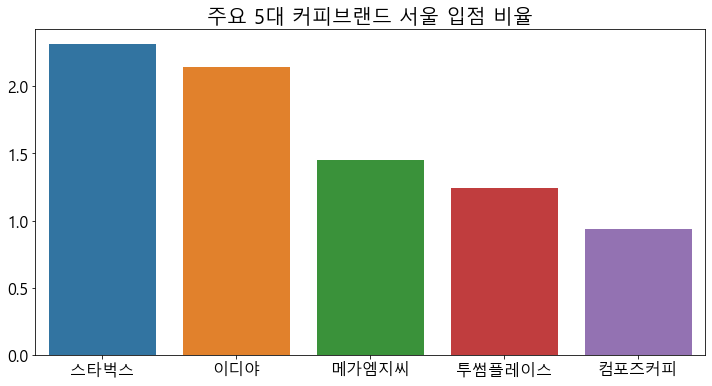

In [122]:
X = ["스타벅스", "이디야", "메가엠지씨", "투썸플레이스", "컴포즈커피"]
y = [starbucks_rate, ediya_rate, magamgc_rate, twosome_rate, compose_rate]

plt.figure(figsize=(12, 6))
plt.title("주요 5대 커피브랜드 서울 입점 비율", fontdict={"fontsize" : 20})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.barplot(x=X, y=y)
plt.savefig("coffee_barplot.png")
plt.show()